In [2]:
import os, shutil

original_dataset_dir = '/Users/ianchen/Desktop/MethaneCNN/train'
base_dir = '/Users/ianchen/Desktop/MethaneCNN/NewTrain'

shutil.rmtree(base_dir, ignore_errors=True)
os.mkdir(base_dir) 
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir) 
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir) 
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir) 

train_cats_dir = os.path.join(train_dir, 'leaks')
os.mkdir(train_cats_dir) 

train_dogs_dir = os.path.join(train_dir, 'nonleaks') 
os.mkdir(train_dogs_dir) 


validation_cats_dir = os.path.join(validation_dir, 'leaks') 
os.mkdir(validation_cats_dir) 
validation_dogs_dir = os.path.join(validation_dir, 'nonleaks') 
os.mkdir(validation_dogs_dir) 

test_cats_dir = os.path.join(test_dir, 'leaks') 
os.mkdir(test_cats_dir) 
test_dogs_dir = os.path.join(test_dir, 'nonleaks') 
os.mkdir(test_dogs_dir) 

In [8]:
fnames = ['leak.frame{}.jpg'.format(i) for i in range(1476, 1487)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['leak.frame{}.jpg'.format(i) for i in range(1489, 1491)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_cats_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['leak.frame{}.jpg'.format(i) for i in range(1491, 1494)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst) 


fnames = ['nonleak.frame{}.jpg'.format(i) for i in range(1, 10)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['nonleak.frame{}.jpg'.format(i) for i in range(10, 14)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) 
    dst = os.path.join(validation_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

fnames = ['nonleak.frame{}.jpg'.format(i) for i in range(14, 18)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst) 

In [11]:
pip install keras

     |████████████████████████████████| 1.7 MB 4.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install tensorflow

     |████████████████████████████████| 244.3 MB 44.2 MB/s eta 0:00:01  |█                               | 8.1 MB 2.7 MB/s eta 0:01:29     |█▎                              | 9.4 MB 2.7 MB/s eta 0:01:29     |█▍                              | 11.0 MB 2.7 MB/s eta 0:01:28██▍                             | 17.9 MB 2.7 MB/s eta 0:01:25     |██▉                             | 21.5 MB 61.0 MB/s eta 0:00:04     |█████▉                          | 44.7 MB 61.0 MB/s eta 0:00:04     |███████▎                        | 55.9 MB 51.6 MB/s eta 0:00:04     |██████████▉                     | 82.3 MB 53.4 MB/s eta 0:00:04     |████████████▉                   | 98.0 MB 53.4 MB/s eta 0:00:03     |███████████████████████████████ | 236.3 MB 29.1 MB/s eta 0:00:01
     |████████████████████████████████| 980 kB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 38.5 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 43.0 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 M

Note: you may need to restart the kernel to use updated packages.


In [15]:
from keras import layers 
from keras import models 

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
from keras import optimizers 

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

/Users/ianchen/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [55]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary' 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary'
)

Found 15 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [56]:

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=1, 
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=1
)


model.save('leak_and_nonleak_1.h5')

<ipython-input-56-7033869643de>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.6463 - acc: 0.7333 - val_loss: 0.7203 - val_acc: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 467ms/step - loss: 0.6187 - acc: 0.7333 - val_loss: 0.7517 - val_acc: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 399ms/step - loss: 0.5802 - acc: 0.7333 - val_loss: 0.7857 - val_acc: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 382ms/step - loss: 0.5763 - acc: 0.7333 - val_loss: 0.8071 - val_acc: 0.5000
Epoch 5/30
1/1 [==============================] - 1s 574ms/step - loss: 0.5676 - acc: 0.7333 - val_loss: 0.8203 - val_acc: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 450ms/step - loss: 0.5686 - acc: 0.7333 - val_loss: 0.8282 - val_acc: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 450ms/step - loss: 0.5773 - acc: 0.7333 - val_loss: 0.8212 - val_acc: 0.5000
Epoch 8/30
1/1 [==============================] - 0s 424ms/step - loss: 0.5960 - acc: 0.7333 

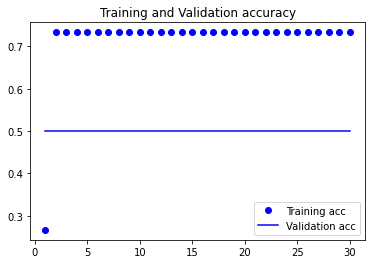

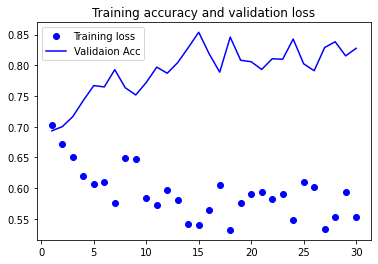

In [67]:
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and Validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validaion Acc') 
plt.title('Training accuracy and validation loss') 
plt.legend() 

plt.show() 

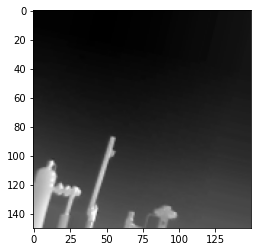

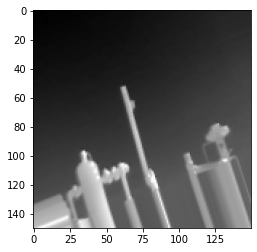

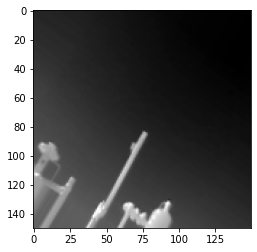

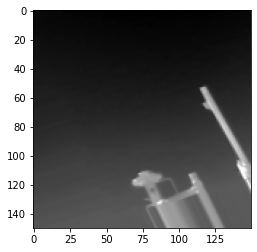

In [30]:
datagen = ImageDataGenerator(
    rotation_range=40,       #
    width_shift_range=0.2,   # 
    height_shift_range=0.2,  # 
    shear_range=0.2,         # 
    zoom_range=0.2,          # 
    horizontal_flip=True,    # 
    fill_mode='nearest'      # 
)

# 
from keras.preprocessing import image 
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]  # 
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)  # 
x = x.reshape((1, ) + x.shape)  # 

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i) 
    i += 1
    imgplot = plt.imshow(array_to_img(batch[0])) 
    if i % 4 == 0:
        break 
plt.show() 

In [58]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [59]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary'
)

history = model.fit_generator(  
    
    train_generator, 
    steps_per_epoch=1, 
    epochs=30, 
    validation_data=validation_generator, 
    validation_steps=1
)

# Save
model.save('leak_and_nonleak_2.h5') 

Found 15 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/30


<ipython-input-59-5f1f3b26d16d>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1/1 [==============================] - 2s 2s/step - loss: 0.7024 - acc: 0.2667 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/30
1/1 [==============================] - 1s 531ms/step - loss: 0.6718 - acc: 0.7333 - val_loss: 0.7002 - val_acc: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 492ms/step - loss: 0.6508 - acc: 0.7333 - val_loss: 0.7166 - val_acc: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 487ms/step - loss: 0.6202 - acc: 0.7333 - val_loss: 0.7427 - val_acc: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 459ms/step - loss: 0.6070 - acc: 0.7333 - val_loss: 0.7671 - val_acc: 0.5000
Epoch 6/30
1/1 [==============================] - 0s 452ms/step - loss: 0.6102 - acc: 0.7333 - val_loss: 0.7649 - val_acc: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 453ms/step - loss: 0.5753 - acc: 0.7333 - val_loss: 0.7929 - val_acc: 0.5000
Epoch 8/30
1/1 [==============================] - 0s 457ms/step - loss: 0.6494 - acc: 0.7333 - val_loss:

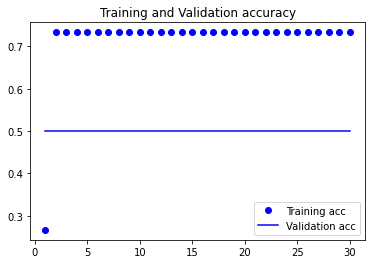

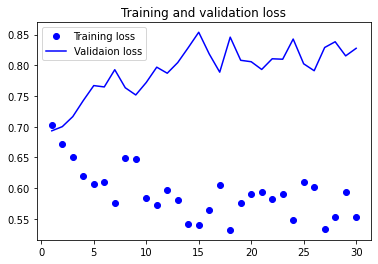

In [60]:
import matplotlib.pyplot as plt 

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(acc) + 1) 

plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and Validation accuracy') 
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validaion loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show() 

In [63]:
f1 = r'/Users/ianchen/Desktop/MethaneCNN/test/frame3018.jpg'  # nonleak
f2 = r'/Users/ianchen/Desktop/MethaneCNN/test/frame4414.jpg'  # leak

from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

img_path = f2
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)  # 
x = x.astype('float32') / 255
x = x.reshape((1, ) + x.shape)  # 

res = model.predict(x)  # 
leak_acc = 1 - res[0][0]
leak_acc

1/1 [==============================] - 0s 30ms/step


0.764123409986496

1/1 [==============================] - 0s 101ms/step


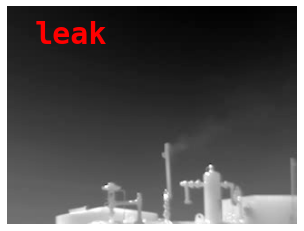

In [64]:
import matplotlib.pyplot as plt 
from keras.preprocessing import image 
from keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

model = load_model('./leak_and_nonleak_2.h5')
image_path = r'./test/frame4404.jpg'  # 
original_image = load_img(image_path)

img = load_img(image_path, target_size=(150, 150))
x = img_to_array(img) 
x = x.astype('float32') / 255 
x = x.reshape((1, ) + x.shape) 

res = model.predict(x)
res = res[0][0]
acc = 1- res

text = 'leak'
if res > 0.5:
    text = 'nonleak'
plt.imshow(original_image)
plt.axis("off")
plt.text(30, 40, text, fontdict=dict(fontsize=30, color='r',
            family='monospace',#
            weight='bold',#
            )#
)
plt.show()

In [65]:
acc

0.7616920471191406